In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
print(tf.__version__)

1.9.0


In [4]:
x_train = np.linspace(0,15,10000)

In [5]:
noise = np.random.randn(len(x_train))

In [6]:
m = 0.5
b = 5

In [7]:
y_train =  m*x_train + b + noise

In [8]:
X = pd.DataFrame(x_train , columns=['X'])
Y = pd.DataFrame(y_train , columns=['Y'])

In [9]:
data = pd.concat([X,Y] , axis = 1)

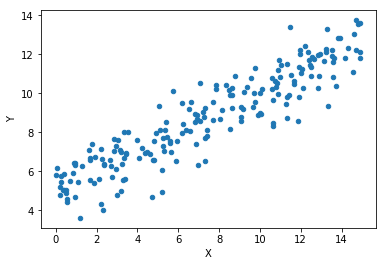

In [10]:
data.sample(200).plot(kind = 'scatter' , x = 'X' , y = 'Y')

In [12]:
m_init = tf.Variable(np.random.rand(1))
b_init = tf.Variable(np.random.rand(1))
batch_size = 8
X = tf.placeholder(tf.float64 , [batch_size])
Y = tf.placeholder(tf.float64 , [batch_size])

In [42]:
Y_pred = m_init*X + b_init

In [43]:
error = tf.reduce_sum(tf.square(Y_pred - Y))

In [44]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [45]:
train = opt.minimize(error)

In [54]:
init = tf.global_variables_initializer()


epochs = 3000
batch_size = 8

with tf.Session() as sess:
    sess.run(init)
    
    for n in range(epochs):
        
        rand_num = np.random.randint(len(x_train) , size = batch_size)
        
        fedd = {X:x_train[rand_num], Y:y_train[rand_num]}
        
        sess.run(train , feed_dict = fedd)
        
        
    final_m , final_b = sess.run([m_init,b_init])    

In [56]:
y_ans = final_m*x_train + final_b

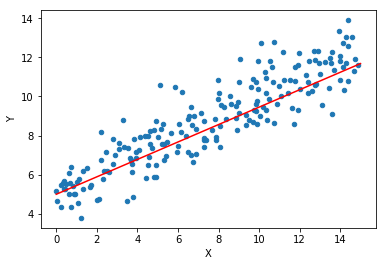

In [61]:
data.sample(200).plot(kind = 'scatter' , x = 'X' , y = 'Y')
plt.plot(x_train,y_ans,'r')
plt.show()

## Tensorflow Estimator API

In [13]:
features = [tf.feature_column.numeric_column('x',shape=[1])]

In [14]:
estimator = tf.estimator.LinearRegressor(features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_mwio1bf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0d101d6c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train , y_train , test_size = 0.3 , random_state = 103)

In [16]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train} , Y_train  , batch_size= 8 , 
                                                num_epochs= None , shuffle= True)

In [17]:
train_func = tf.estimator.inputs.numpy_input_fn({'x':X_train} , Y_train  , batch_size= 8 , 
                                                num_epochs= 1000 , shuffle= False)

In [25]:
test_func = tf.estimator.inputs.numpy_input_fn({'x':X_test} , Y_test  , batch_size= 8 , 
                                                num_epochs= 1000 , shuffle= True)

In [19]:
estimator.train(input_fn=input_func , steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_mwio1bf/model.ckpt.
INFO:tensorflow:loss = 795.665, step = 0
INFO:tensorflow:global_step/sec: 891.591
INFO:tensorflow:loss = 30.980103, step = 100 (0.112 sec)
INFO:tensorflow:global_step/sec: 1295.81
INFO:tensorflow:loss = 24.384693, step = 200 (0.077 sec)
INFO:tensorflow:global_step/sec: 1320.55
INFO:tensorflow:loss = 11.691988, step = 300 (0.076 sec)
INFO:tensorflow:global_step/sec: 1406.61
INFO:tensorflow:loss = 4.7335043, step = 400 (0.071 sec)
INFO:tensorflow:global_step/sec: 1431.88
INFO:tensorflow:loss = 2.6514165, step = 500 (0.070 sec)
INFO:tensorflow:global_step/sec: 1342.65
INFO:tensorflow:loss = 24.462896, step = 600 (0.075 sec)
INFO:tensorflow:global_step/sec: 1238.2
INFO:tensorflow:los

In [20]:
#if 'session' in locals() and session is not None:
#    print('Close interactive session')
#    session.close()


In [26]:
train_metrics = estimator.evaluate(input_fn=train_func,steps=1000)
print(train_metrics)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-24-12:18:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_mwio1bf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-24-12:18:20
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0933044, global_step = 1000, loss = 8.746435
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_mwio1bf/model.ckpt-1000
{'average_loss': 

In [27]:
test_metrics = estimator.evaluate(input_fn=test_func,steps=1000)
print(test_metrics)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-24-12:18:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_mwio1bf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-24-12:18:22
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0785792, global_step = 1000, loss = 8.6286335
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_mwio1bf/model.ckpt-1000
{'average_loss':

In [50]:
new_data = np.linspace(0,10,10)

pred_func = tf.estimator.inputs.numpy_input_fn({'x':X_test} , shuffle=False)

preds = estimator.predict(pred_func)

In [54]:
y_pred = []
for pred in estimator.predict(pred_func):
    y_pred.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_mwio1bf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


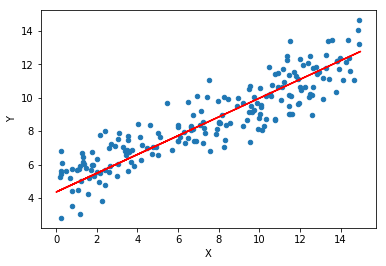

In [55]:
data.sample(200).plot(kind = 'scatter' , x = 'X' , y = 'Y')
plt.plot(X_test,y_pred,'r')